### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
airline_data = pd.read_excel('Airlines+Data.xlsx')
airline_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


### Data Understanding

In [3]:
airline_data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
airline_data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

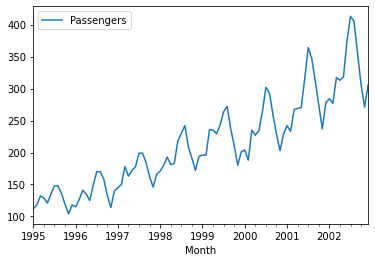

In [5]:
data = pd.read_excel('Airlines+Data.xlsx',index_col='Month',parse_dates = True)
data.plot()
plt.show()

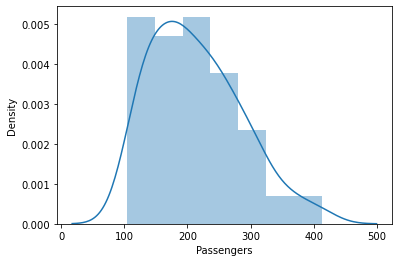

In [6]:
sns.distplot(airline_data.Passengers)
plt.show()

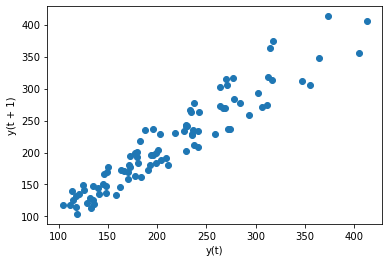

In [7]:
from pandas.plotting import lag_plot
lag_plot(data)
plt.show()

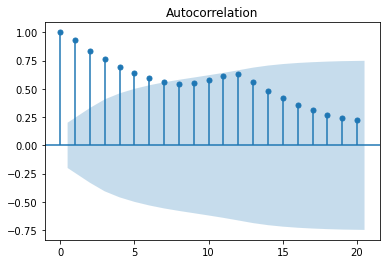

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.show()

In [9]:
import datetime as dt

In [10]:
airline_data['months'] = airline_data.Month.dt.strftime("%b")
airline_data['year'] = airline_data.Month.dt.strftime('%Y')

In [11]:
airline_data

,Month,Passengers,months,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [12]:
airline_pivot = pd.pivot_table(data = airline_data, values='Passengers',index='year',columns='months')
airline_pivot

months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


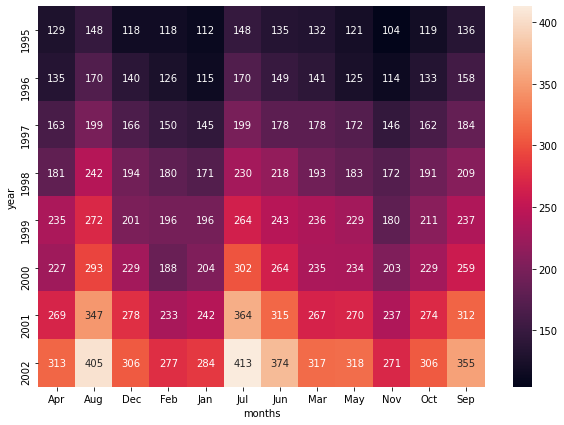

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(airline_pivot,annot=True, fmt='g')
plt.show()

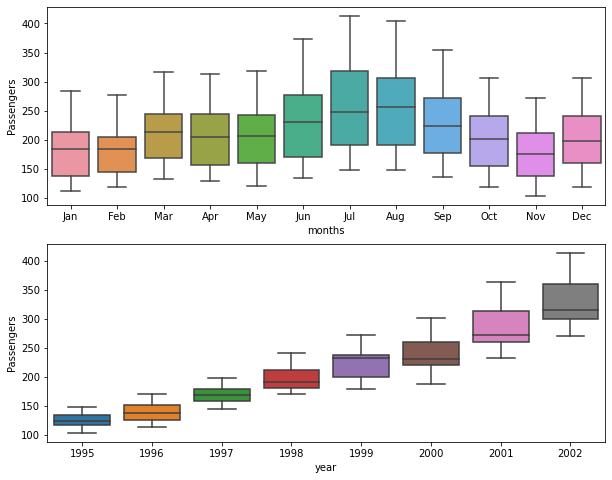

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x = airline_data.months, y = airline_data.Passengers)
plt.subplot(2,1,2)
sns.boxplot(x = airline_data.year, y = airline_data.Passengers)
plt.show()

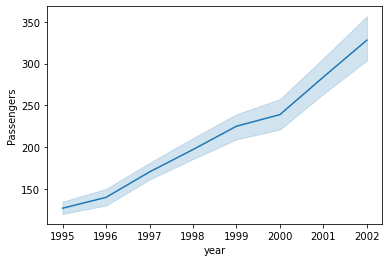

In [15]:
sns.lineplot(x = airline_data.year, y = airline_data.Passengers)
plt.show()

In [16]:
airline_data

,Month,Passengers,months,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [17]:
month_df = pd.get_dummies(airline_data.months)

In [18]:
df = pd.concat([airline_data,month_df],axis=1)
df

,Month,Passengers,months,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
df['t'] = np.arange(1,97)
df['t_square'] = df.t * df.t
df['log_passengers'] = np.log(df.Passengers)

In [20]:
df

,Month,Passengers,months,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


### Model Building    Model Training    Model Testing

In [21]:
#splitting data
train = df.head(84)
test = df.tail(12)

In [22]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data = train).fit()

pred_linear = linear_model.predict(test['t'])

rmse_linear = np.sqrt(np.mean(((test.Passengers)-(pred_linear))**2))
rmse_linear

53.199236534802715

In [23]:
#Exponential

Exp = smf.ols('log_passengers~t',data=train).fit()
pred_Exp = Exp.predict(test['t'])
rmse_Exp = np.sqrt(np.mean(((test['Passengers'])-(np.exp(pred_Exp)))**2))
rmse_Exp

46.0573611031562

In [24]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=train).fit()
pred_Quad = Quad.predict(test[["t","t_square"]])
rmse_Quad = np.sqrt(np.mean(((test['Passengers'])-(pred_Quad))**2))
rmse_Quad

48.051888979330975

In [25]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea = add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
rmse_add_sea = np.sqrt(np.mean(((test['Passengers'])-(pred_add_sea))**2))
rmse_add_sea

132.81978481421822

In [26]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea_quad = add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']])
rmse_add_sea_quad = np.sqrt(np.mean(((test['Passengers'])-(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.36081761210106

In [27]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_sea = Mul_sea.predict(test)
rmse_Mult_sea = np.sqrt(np.mean(((test['Passengers'])-(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.0632020470866

In [28]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

10.519172544323263

In [29]:
# comparing
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,53.199237
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
3,rmse_add_sea,132.819785
4,rmse_add_sea_quad,26.360818
5,rmse_Mult_sea,140.063202
6,rmse_Mult_add_sea,10.519173


#### OBSERVATION:
    
*  Multiplicative Additive Seasonality gives the best prediction at RMSE 10

### predict for new data

In [30]:
t = np.arange(97,109)
t_squared=np.array(t*t)
Month =['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-11-01','2003-12-01']
new_df=pd.DataFrame({'t':t,'t_squared':t_squared,'month':Month})

In [31]:
new_df

,t,t_squared,month
0,97,9409,2003-01-01
1,98,9604,2003-02-01
2,99,9801,2003-03-01
3,100,10000,2003-04-01
4,101,10201,2003-05-01
5,102,10404,2003-06-01
6,103,10609,2003-07-01
7,104,10816,2003-08-01
8,105,11025,2003-09-01
9,106,11236,2003-10-01


In [32]:
new_df.month = pd.to_datetime(new_df.month)
new_df['months'] = new_df.month.dt.strftime("%b")
months_dummy = pd.get_dummies(new_df.months)
df_pred = pd.concat([new_df,months_dummy],axis=1)
df_pred

,t,t_squared,month,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,97,9409,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,98,9604,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,99,9801,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,100,10000,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,101,10201,2003-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0
5,102,10404,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0
6,103,10609,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0
7,104,10816,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0
8,105,11025,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1
9,106,11236,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
# Build the model on entire dataset
model_full = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = df).fit()
pred_new  = pd.Series(model_full.predict(df_pred))

In [34]:
df_pred["forecasted_Passengers"] = pd.Series(np.exp(pred_new))
df_pred

,t,t_squared,month,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_Passengers
0,97,9409,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,320.779889
1,98,9604,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,324.173779
2,99,9801,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,374.075905
3,100,10000,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0,361.986306
4,101,10201,2003-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0,359.632793
5,102,10404,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0,407.045777
6,103,10609,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0,452.677464
7,104,10816,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,451.720349
8,105,11025,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,404.569872
9,106,11236,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,355.211286


In [35]:
new_var = pd.concat([df,df_pred])
new_var

,Month,Passengers,months,year,Apr,Aug,Dec,Feb,Jan,Jul,...,May,Nov,Oct,Sep,t,t_square,log_passengers,t_squared,month,forecasted_Passengers
0,1995-01-01,112.0,Jan,1995,0,0,0,0,1,0,...,0,0,0,0,1,1.0,4.718499,NaN,NaT,NaN
1,1995-02-01,118.0,Feb,1995,0,0,0,1,0,0,...,0,0,0,0,2,4.0,4.770685,NaN,NaT,NaN
2,1995-03-01,132.0,Mar,1995,0,0,0,0,0,0,...,0,0,0,0,3,9.0,4.882802,NaN,NaT,NaN
3,1995-04-01,129.0,Apr,1995,1,0,0,0,0,0,...,0,0,0,0,4,16.0,4.859812,NaN,NaT,NaN
4,1995-05-01,121.0,May,1995,0,0,0,0,0,0,...,1,0,0,0,5,25.0,4.795791,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,NaT,NaN,Aug,NaN,0,1,0,0,0,0,...,0,0,0,0,104,NaN,NaN,10816.0,2003-08-01,451.720349
8,NaT,NaN,Sep,NaN,0,0,0,0,0,0,...,0,0,0,1,105,NaN,NaN,11025.0,2003-09-01,404.569872
9,NaT,NaN,Oct,NaN,0,0,0,0,0,0,...,0,0,1,0,106,NaN,NaN,11236.0,2003-10-01,355.211286
10,NaT,NaN,Nov,NaN,0,0,0,0,0,0,...,0,1,0,0,107,NaN,NaN,11449.0,2003-11-01,311.768944


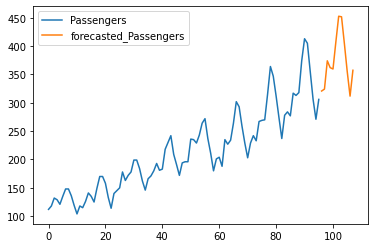

In [36]:
new_var[['Passengers','forecasted_Passengers']].reset_index(drop=True).plot()
plt.show()